<a href="https://colab.research.google.com/github/vssvprasad/DIY-FaceApp/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train[:5] #we need 1d array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_train=y_train.reshape(-1,)

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

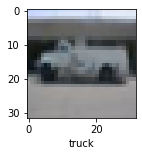

In [7]:
plot_sample(x_train,y_train,110)

In [8]:
x_train= x_train/255
x_test = x_test/255

In [9]:
# #simple ANN
# ann = models.Sequential([
#             layers.Flatten(input_shape = (32,32,3)),
#             layers.Dense(3000, activation='relu'),
#             layers.Dense(1000, activation='relu'),
#             layers.Dense(10, activation='sigmoid')
#             ])
# ann.compile(optimizer= 'SGD',
#             loss= 'sparse_categorical_crossentropy',
#             metrics= ['accuracy'])
# ann.fit(x_train, y_train, epochs=5)

In [10]:
#cnn
cnn = models.Sequential([
            #cnn
            layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'relu', input_shape= (32,32,3)),
            layers.MaxPool2D((2,2)),

            layers.Conv2D(filters=64, kernel_size=(3,3), activation= 'relu'),
            layers.MaxPool2D((2,2)),
            #dense
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
            ])

In [11]:
cnn.compile(optimizer= 'adam',
            loss= 'sparse_categorical_crossentropy',
            metrics= ['accuracy'])

In [13]:
cnn.fit(x_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5738 - accuracy: 0.7996
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5380 - accuracy: 0.8108
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5098 - accuracy: 0.8215
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4772 - accuracy: 0.8328
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4529 - accuracy: 0.8392
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4254 - accuracy: 0.8500
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4003 - accuracy: 0.8578
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3799 - accuracy: 0.8659
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3519 - accuracy: 0.8754
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.335

In [14]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.4377 - accuracy: 0.6623


[3.4377434253692627, 0.6622999906539917]

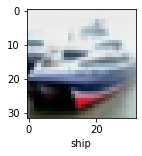

In [15]:
y_test = y_test.reshape(-1,)
plot_sample(x_test,y_test,1)

In [16]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.91118755e-22, 4.60144560e-22, 2.16205553e-13, 9.99999285e-01,
        1.91420701e-21, 1.80596965e-12, 2.53041965e-09, 1.42469877e-24,
        7.12801352e-07, 2.30599642e-31],
       [8.14405196e-21, 6.28434122e-04, 1.31502729e-31, 1.68393730e-29,
        0.00000000e+00, 0.00000000e+00, 5.62096338e-36, 1.02440656e-30,
        9.99371588e-01, 1.26502557e-16],
       [3.13386699e-04, 5.99705672e-04, 6.76563416e-10, 2.37320637e-06,
        1.18446716e-13, 2.83515420e-12, 3.40082725e-13, 1.22287673e-07,
        9.99054015e-01, 3.03605048e-05],
       [4.69713807e-01, 1.75195497e-10, 1.37784706e-11, 1.15694945e-06,
        9.56754294e-12, 7.99542109e-18, 3.00229086e-09, 9.45987470e-14,
        5.30285060e-01, 1.67622145e-15],
       [1.96902467e-33, 8.16529393e-28, 1.55578226e-15, 1.13338274e-21,
        1.00000000e+00, 2.87919105e-17, 1.72534573e-11, 1.90487195e-34,
        5.02240651e-33, 3.97851867e-29]], dtype=float32)

In [17]:
y_classes= [np.argmax(element) for element in y_pred]

In [18]:
y_classes[:5]

[3, 8, 8, 8, 4]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print('classification report:\n', classification_report(y_test, y_classes))

classification report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1000
           1       0.76      0.81      0.78      1000
           2       0.55      0.56      0.56      1000
           3       0.45      0.46      0.46      1000
           4       0.62      0.55      0.58      1000
           5       0.53      0.55      0.54      1000
           6       0.69      0.78      0.73      1000
           7       0.71      0.72      0.72      1000
           8       0.82      0.76      0.79      1000
           9       0.76      0.74      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [22]:
confusion_matrix(y_test,y_classes)

array([[701,  39,  63,  27,  30,  15,  12,  17,  62,  34],
       [ 19, 805,  12,   8,   7,  10,  15,   5,  20,  99],
       [ 55,  11, 562,  87,  67,  75,  82,  41,  12,   8],
       [ 21,  19,  65, 461,  75, 202,  78,  52,  16,  11],
       [ 15,   5, 111, 100, 545,  57,  80,  70,  11,   6],
       [ 14,   2,  84, 169,  44, 549,  47,  71,   9,  11],
       [  6,   6,  61,  61,  33,  28, 777,  12,  12,   4],
       [ 22,   6,  35,  56,  57,  69,  16, 722,   3,  14],
       [ 60,  48,  15,  24,  12,  11,  10,   9, 761,  50],
       [ 37, 115,   9,  25,   7,  20,   9,  12,  26, 740]])